In [1]:
import seaborn as sns
import pandas as pd
import os
from matplotlib.colors import TwoSlopeNorm
import matplotlib.pyplot as plt

In [2]:
#no need to do it more than once
colname = ["p1", "p2", "n1", "n2", "orc_gap", 
           "upper_gap", "lower_gap", "frc_gap", 
            "bfc_gap", "ulc_gap", "orcs", "urcs", "lrcs", "frcs", "bfcs", "ulcs", "orcq", "urcq", "lrcq", "frcq", "bfcq", "ulcq"]
combined_df = pd.DataFrame(columns = colname)
for filename in os.listdir("one_sum"):
    if filename.startswith('s'):
        with open(os.path.join("one_sum", filename), 'r') as f: # open in readonly mode
            df = pd.read_csv(f, header = None, names = colname, skiprows = 1 )
            combined_df = pd.merge(combined_df, df, how = "outer")
            print(df.shape)
            print(combined_df.shape)
            print("next")
combined_df = combined_df.sort_values(by = ["p1", "p2"])        
combined_df.to_csv("combined_df.csv")

(249, 22)
(249, 22)
next
(265, 22)
(514, 22)
next
(250, 22)
(764, 22)
next
(265, 22)
(1029, 22)
next
(250, 22)
(1279, 22)
next
(265, 22)
(1544, 22)
next
(250, 22)
(1794, 22)
next
(265, 22)
(2059, 22)
next
(250, 22)
(2309, 22)
next
(265, 22)
(2574, 22)
next
(250, 22)
(2824, 22)
next
(265, 22)
(3089, 22)
next
(250, 22)
(3339, 22)
next
(265, 22)
(3604, 22)
next
(250, 22)
(3854, 22)
next
(265, 22)
(4119, 22)
next
(250, 22)
(4369, 22)
next
(265, 22)
(4634, 22)
next
(250, 22)
(4884, 22)
next
(265, 22)
(5149, 22)
next


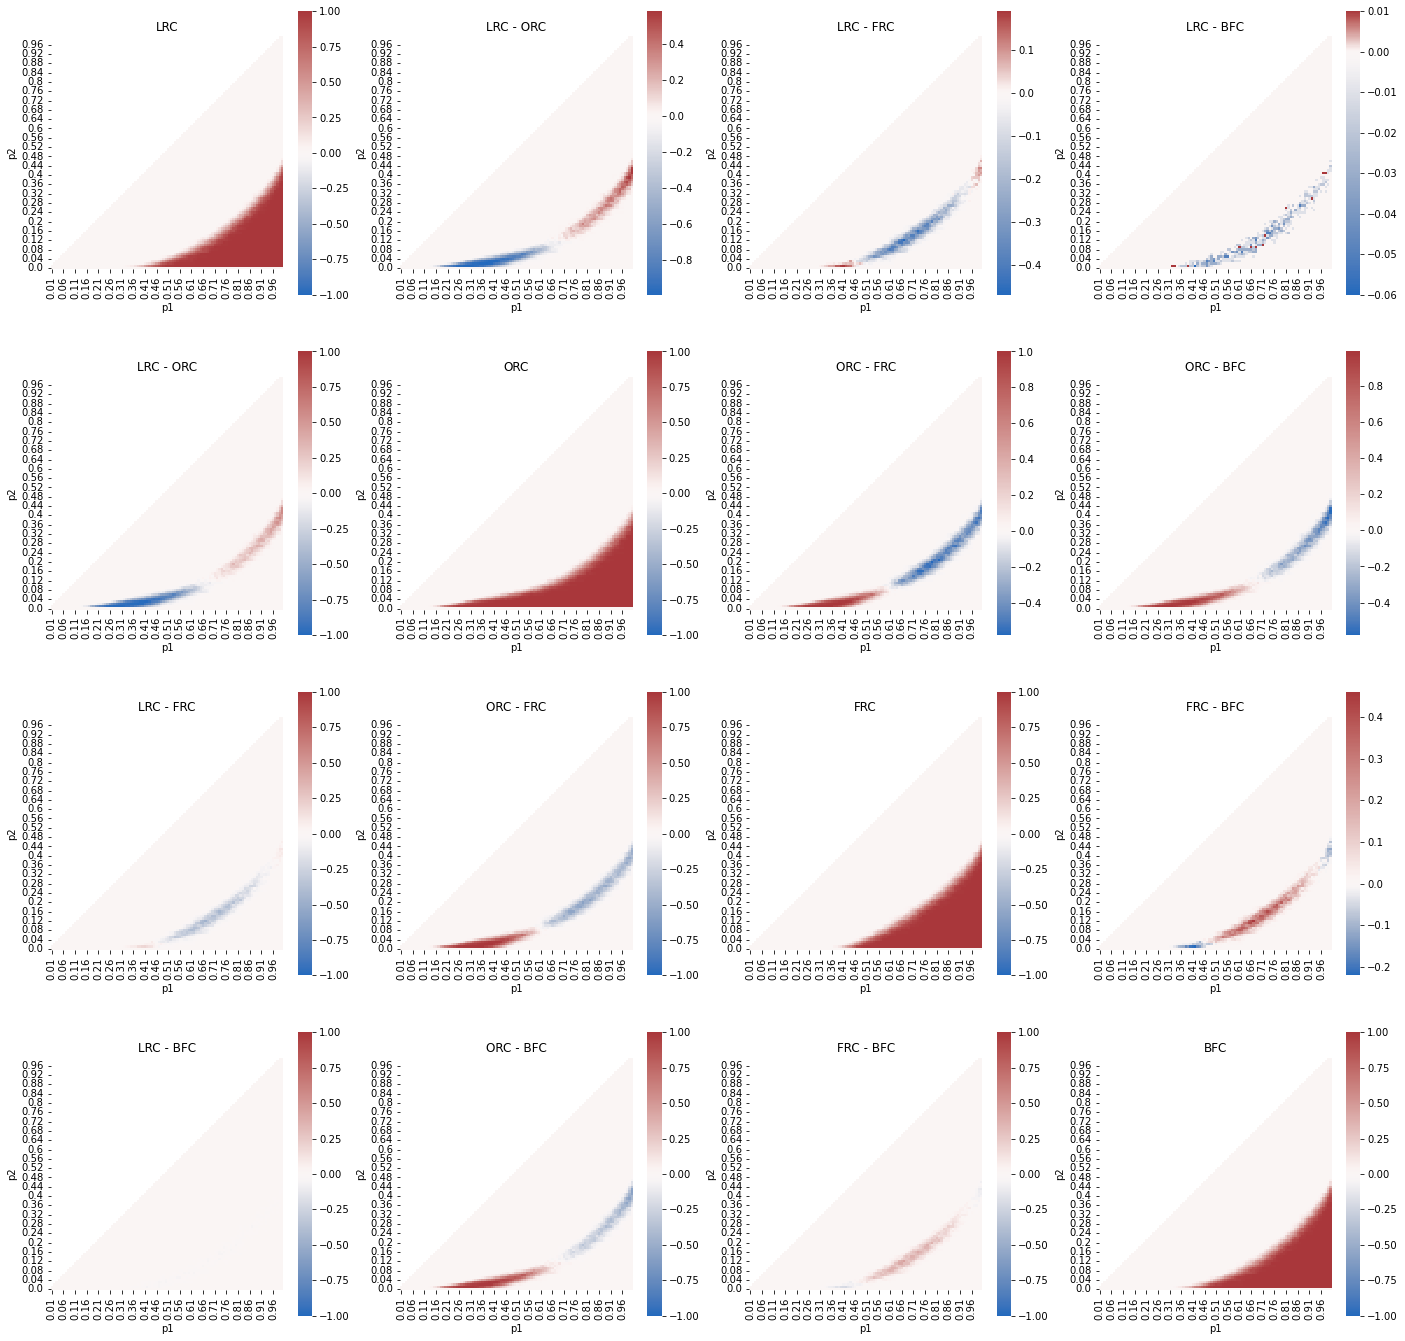

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a figure and a 2x2 grid of subplots
fig, axs = plt.subplots(4, 4, figsize=(24, 24))

# Create each heatmap
i = 0
scorelist = ["lower_gap", "orc_gap", "frc_gap", 
            "bfc_gap"]
title0 = ["LRC", "ORC", "FRC", "BFC"]
for val in scorelist:
    piv = pd.pivot_table(combined_df, values=val,index=["p2"], columns=["p1"])
    #plot pivot table as heatmap using seaborn
    divnorm = TwoSlopeNorm(vmin = -1, vcenter=0, vmax=1)
    plt.figure(figsize=(5, 5))
    ax = sns.heatmap(piv, square=True, cmap = "vlag", norm=divnorm, ax = axs[i, i])
    ax.invert_yaxis()
    axs[i, i].set_title(title0[i])
    i = i+1
res1 = [(a, b) for idx, a in enumerate(scorelist) for b in scorelist[idx + 1:]]
i = 0
location = [(0,1), (0,2), (0,3), (1,2), (1,3), (2,3)]
title1 = ["LRC - ORC", "LRC - FRC", "LRC - BFC", "ORC - FRC", "ORC - BFC", "FRC - BFC"]
for val in res1:
    newtitle = str(val[0]) + "_" + str(val[1])
    combined_df[newtitle] = combined_df[str(val[0])] - combined_df[str(val[1])]
    piv = pd.pivot_table(combined_df, values=newtitle,index=["p2"], columns=["p1"])
    #plot pivot table as heatmap using seaborn
    divnorm = TwoSlopeNorm(vmin = combined_df[newtitle].min(), vcenter=0, vmax=combined_df[newtitle].max())
    plt.figure(figsize=(5, 5))
    ax = sns.heatmap(piv, square=True, cmap = "vlag", norm=divnorm, ax = axs[location[i][0], location[i][1]])
    ax.invert_yaxis()
    axs[location[i][0], location[i][1]].set_title(title1[i])
    i = i+1
    
location2 = [(1,0), (2,0), (3,0), (2,1), (3,1), (3,2)]
i = 0
for val in res1:
    newtitle = str(val[0]) + "_" + str(val[1])
    combined_df[newtitle] = combined_df[str(val[0])] - combined_df[str(val[1])]
    piv = pd.pivot_table(combined_df, values=newtitle,index=["p2"], columns=["p1"])
    #plot pivot table as heatmap using seaborn
    divnorm = TwoSlopeNorm(vmin = -1, vcenter=0, vmax=1)
    plt.figure(figsize=(5, 5))
    ax = sns.heatmap(piv, square=True, cmap = "vlag", norm=divnorm, ax = axs[location2[i][0], location2[i][1]])
    ax.invert_yaxis()
    axs[location2[i][0], location2[i][1]].set_title(title1[i])
    i = i + 1

# Optionally, adjust the layout
plt.tight_layout()
fig.savefig("gap.pdf", dpi = 100, bbox_inches = 'tight')
plt.show()


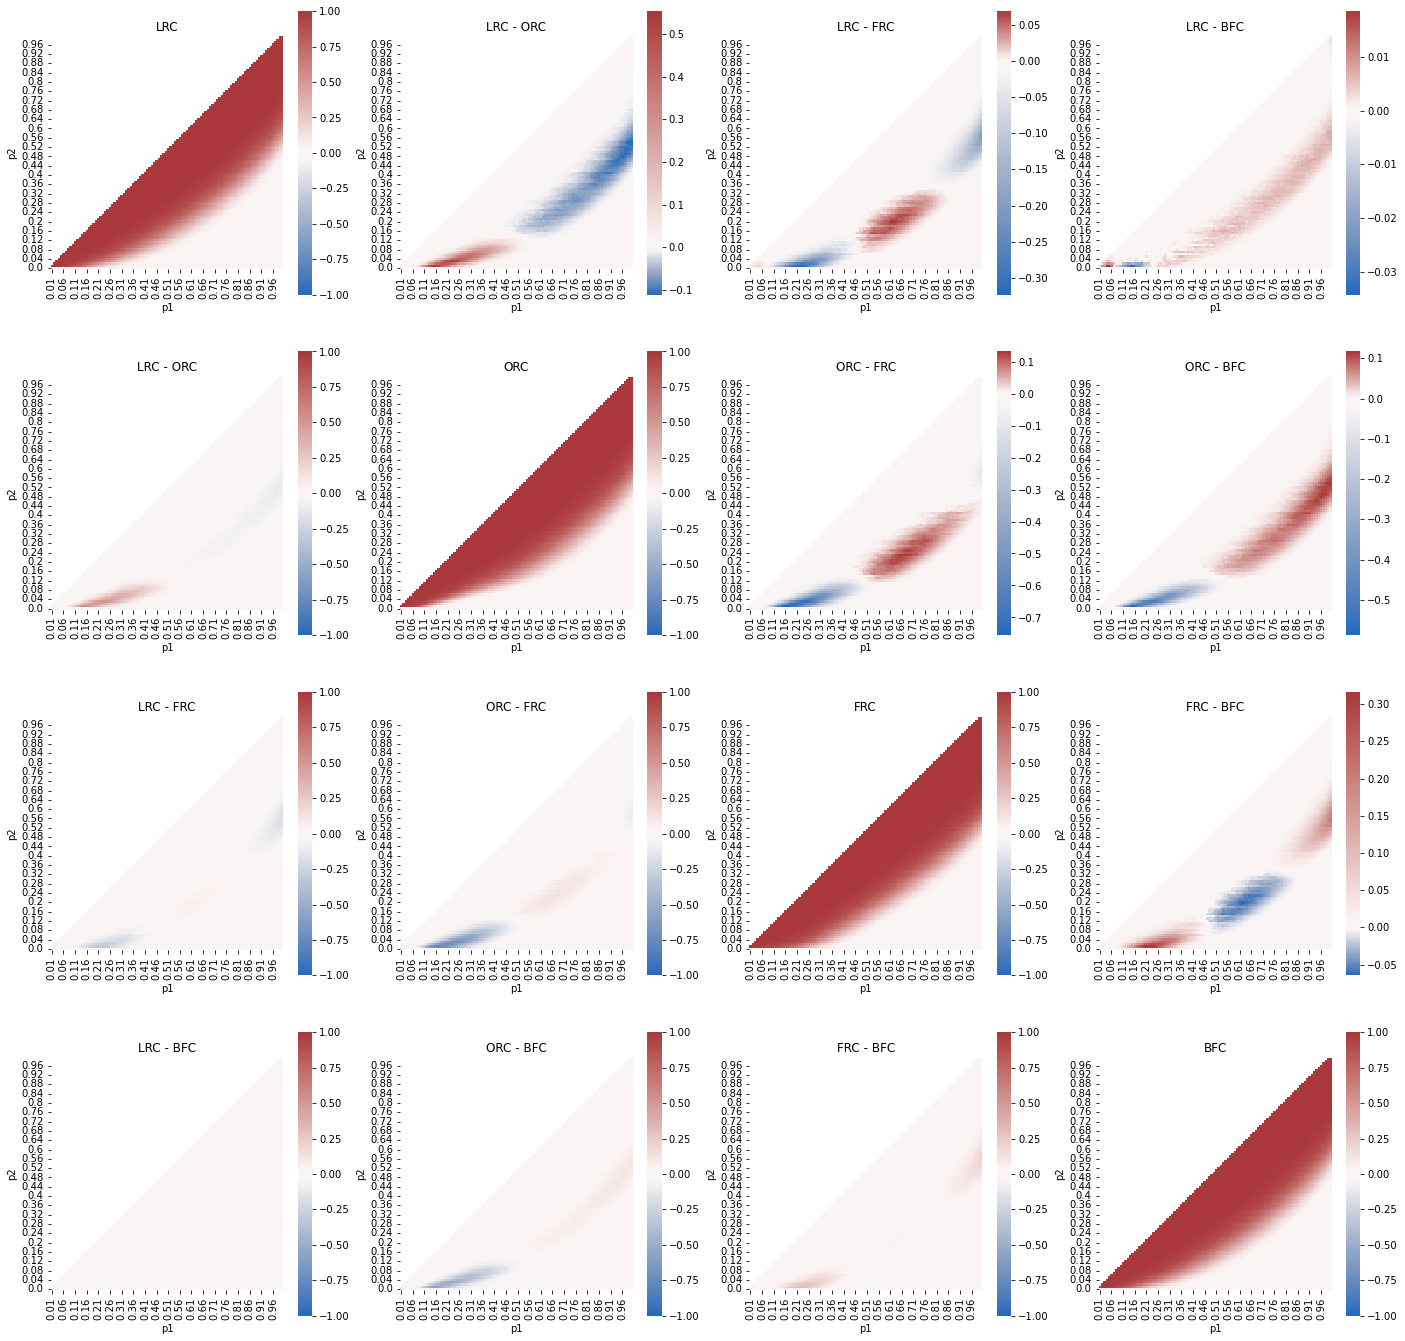

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a figure and a 2x2 grid of subplots
fig, axs = plt.subplots(4, 4, figsize=(24, 24))

# Create each heatmap
i = 0
scorelist2 = [ "lrcs", "orcs", "frcs", "bfcs"]
title0 = ["LRC", "ORC", "FRC", "BFC"]
for val in scorelist2:
    piv = pd.pivot_table(combined_df, values=val,index=["p2"], columns=["p1"])
    #plot pivot table as heatmap using seaborn
    divnorm = TwoSlopeNorm(vmin = -1, vcenter=0, vmax=1)
    plt.figure(figsize=(5, 5))
    ax = sns.heatmap(piv, square=True, cmap = "vlag", norm=divnorm, ax = axs[i, i])
    ax.invert_yaxis()
    axs[i, i].set_title(title0[i])
    i = i+1
res2 = [(a, b) for idx, a in enumerate(scorelist2) for b in scorelist2[idx + 1:]]
i = 0
location = [(0,1), (0,2), (0,3), (1,2), (1,3), (2,3)]
title1 = ["LRC - ORC", "LRC - FRC", "LRC - BFC", "ORC - FRC", "ORC - BFC", "FRC - BFC"]
for val in res2:
    newtitle = str(val[0]) + "_" + str(val[1])
    combined_df[newtitle] = combined_df[str(val[0])] - combined_df[str(val[1])]
    piv = pd.pivot_table(combined_df, values=newtitle,index=["p2"], columns=["p1"])
    #plot pivot table as heatmap using seaborn
    divnorm = TwoSlopeNorm(vmin = combined_df[newtitle].min(), vcenter=0, vmax=combined_df[newtitle].max())
    plt.figure(figsize=(5, 5))
    ax = sns.heatmap(piv, square=True, cmap = "vlag", norm=divnorm, ax = axs[location[i][0], location[i][1]])
    ax.invert_yaxis()
    axs[location[i][0], location[i][1]].set_title(title1[i])
    i = i+1
    
location2 = [(1,0), (2,0), (3,0), (2,1), (3,1), (3,2)]
i = 0
for val in res2:
    newtitle = str(val[0]) + "_" + str(val[1])
    combined_df[newtitle] = combined_df[str(val[0])] - combined_df[str(val[1])]
    piv = pd.pivot_table(combined_df, values=newtitle,index=["p2"], columns=["p1"])
    #plot pivot table as heatmap using seaborn
    divnorm = TwoSlopeNorm(vmin = -1, vcenter=0, vmax=1)
    plt.figure(figsize=(5, 5))
    ax = sns.heatmap(piv, square=True, cmap = "vlag", norm=divnorm, ax = axs[location2[i][0], location2[i][1]])
    ax.invert_yaxis()
    axs[location2[i][0], location2[i][1]].set_title(title1[i])
    i = i + 1

# Optionally, adjust the layout
plt.tight_layout()
fig.savefig("score.pdf", dpi = 100, bbox_inches = 'tight')
plt.show()


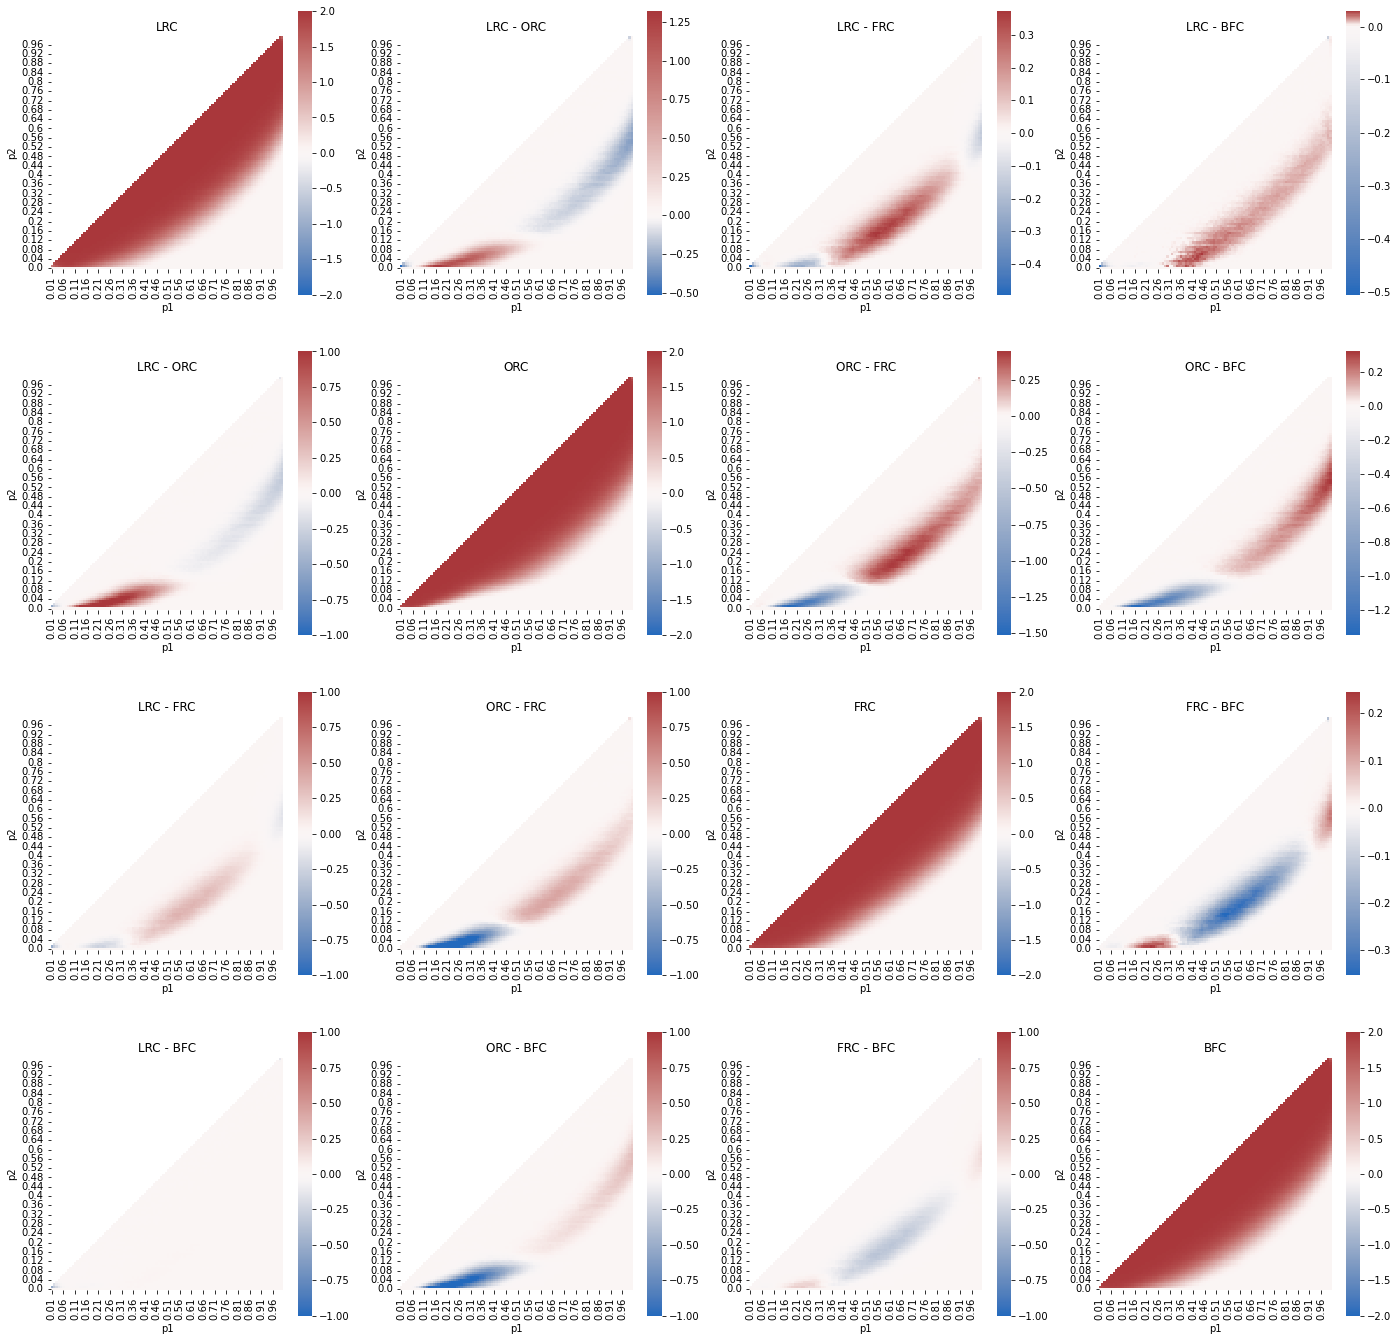

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a figure and a 2x2 grid of subplots
fig, axs = plt.subplots(4, 4, figsize=(24, 24))

# Create each heatmap
i = 0
scorelist3 = ["lrcq", "orcq", "frcq", "bfcq"]
title0 = ["LRC", "ORC", "FRC", "BFC"]
for val in scorelist3:
    piv = pd.pivot_table(combined_df, values=val,index=["p2"], columns=["p1"])
    #plot pivot table as heatmap using seaborn
    divnorm = TwoSlopeNorm(vmin = -2, vcenter=0, vmax=2)
    plt.figure(figsize=(5, 5))
    ax = sns.heatmap(piv, square=True, cmap = "vlag", norm=divnorm, ax = axs[i, i])
    ax.invert_yaxis()
    axs[i, i].set_title(title0[i])
    i = i+1
res3 = [(a, b) for idx, a in enumerate(scorelist3) for b in scorelist3[idx + 1:]]
i = 0
location = [(0,1), (0,2), (0,3), (1,2), (1,3), (2,3)]
title1 = ["LRC - ORC", "LRC - FRC", "LRC - BFC", "ORC - FRC", "ORC - BFC", "FRC - BFC"]
for val in res3:
    newtitle = str(val[0]) + "_" + str(val[1])
    combined_df[newtitle] = combined_df[str(val[0])] - combined_df[str(val[1])]
    piv = pd.pivot_table(combined_df, values=newtitle,index=["p2"], columns=["p1"])
    #plot pivot table as heatmap using seaborn
    divnorm = TwoSlopeNorm(vmin = combined_df[newtitle].min(), vcenter=0, vmax=combined_df[newtitle].max())
    plt.figure(figsize=(5, 5))
    ax = sns.heatmap(piv, square=True, cmap = "vlag", norm=divnorm, ax = axs[location[i][0], location[i][1]])
    ax.invert_yaxis()
    axs[location[i][0], location[i][1]].set_title(title1[i])
    i = i+1
    
location2 = [(1,0), (2,0), (3,0), (2,1), (3,1), (3,2)]
i = 0
for val in res3:
    newtitle = str(val[0]) + "_" + str(val[1])
    combined_df[newtitle] = combined_df[str(val[0])] - combined_df[str(val[1])]
    piv = pd.pivot_table(combined_df, values=newtitle,index=["p2"], columns=["p1"])
    #plot pivot table as heatmap using seaborn
    divnorm = TwoSlopeNorm(vmin = -1, vcenter=0, vmax=1)
    plt.figure(figsize=(5, 5))
    ax = sns.heatmap(piv, square=True, cmap = "vlag", norm=divnorm, ax = axs[location2[i][0], location2[i][1]])
    ax.invert_yaxis()
    axs[location2[i][0], location2[i][1]].set_title(title1[i])
    i = i + 1

# Optionally, adjust the layout
plt.tight_layout()
fig.savefig("quantile.pdf", dpi = 100, bbox_inches = 'tight')
plt.show()
